<a href="https://colab.research.google.com/github/jlopez12/Analisis_prediccion_de_ventas-Part_1/blob/development/Proyecto_1_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conectar a Drive y leer documento

In [1]:
# Conectar Colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Importa libreria.
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Establecer conexion al documento
path = "/content/drive/MyDrive/Colab Notebooks/DB/retail_sales_dataset.csv"
df = pd.read_csv(path)

#Primera vista al Data Frame

In [4]:
# Se revisan las columnas y tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#Limpieza de columnas

In [5]:
# Pasa todas las columnas a minusculas.
df.columns = df.columns.str.lower()

In [6]:
# Diccionario de caracteres que quiero reemplazar en los nombres de columnas.
# Aunque no se visualizan tildes, parentesis o ° se mantiene en el diccionario.
reemplazar = {
    "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u",
    " ":"_","(":"",")":"","°":"",".":""
    }

In [7]:
# Se recorre el diccionario de caracteres a reemplazar y se aplica en las columnas
for actual, nuevo in reemplazar.items():
  df.columns = df.columns.str.replace(actual,nuevo)

In [8]:
# Se verifican los cambios.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


* Transformación de Datos

Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

In [9]:
# Crea columna Total Venta para verificar el Total amount
df["total_venta"] = df["quantity"] * df["price_per_unit"]

Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [10]:
# Funcion para clasifivar venta segun Total Venta.
def venta_tipo(total):
  if total <= 200:
    return 'Baja'
  elif total <= 300:
    return 'Media'
  else:
    return 'Alta'

In [12]:
# Mediante apply se verifica la clasificacion de la venta.
df["clasificacion"] = df["total_venta"].apply(venta_tipo)

In [13]:
# Verifica la columna creada.
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,total_venta,clasificacion
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Alta
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Alta
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja


* Convierte la columna date a fecha.


In [36]:
# Se conviete date a formato fecha.
df['date'] = pd.to_datetime(df['date'])

Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

In [14]:
# Funcion para calcular la desviacion.
def calcular_std(grupo):
    # Obtiene el promedio del total de ventas
    prom = grupo['total_venta'].mean().round(2)
    # Crea columna donde el valor sea el total de venta menos el promedio para mostrar cuanto se desvia cada venta el promedio.
    grupo['desviacion_por_total'] = grupo['total_venta'] - prom
    return grupo

# Agrupa por categoria de productos y aplicar el calculo.
df = df.groupby('product_category').apply(calcular_std)


/tmp/ipython-input-14-980126862.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('product_category').apply(calcular_std)


In [15]:
# Verifica la nueva columna
df.head(20)

transaction_id        date customer_id  gender  age  \
product_category                                                           
Beauty           0                1  2023-11-24     CUST001    Male   34   
                 4                5  2023-05-06     CUST005    Male   30   
                 5                6  2023-04-25     CUST006  Female   45   
                 11              12  2023-10-30     CUST012    Male   35   
                 20              21  2023-01-14     CUST021  Female   50   
                 24              25  2023-12-26     CUST025  Female   64   
                 26              27  2023-08-03     CUST027  Female   38   
                 27              28  2023-04-23     CUST028  Female   43   
                 29              30  2023-10-29     CUST030  Female   39   
                 31              32  2023-01-04     CUST032    Male   30   
                 34              35  2023-08-05     CUST035  Female   58   
                 35              36  2023-06-24     CUST036    Male   52   
                 36              37  2023-05-23     CUST037  Female   18   
                 37              38  2023-03-21     CUST038    Male   38   
                 39              40  2023-06-22     CUST040    Male   45   
                 46              47  2023-11-06     CUST047  Female   40   
                 49              50  2023-08-24     CUST050  Female   27   
                 50              51  2023-10-02     CUST051    Male   27   
                 51              52  2023-03-05     CUST052  Female   36   
                 54              55  2023-10-10     CUST055    Male   31   

                    product_category  quantity  price_per_unit  total_amount  \
product_category                                                               
Beauty           0            Beauty         3              50           150   
                 4            Beauty         2              50           100   
                 5            Beauty         1              30            30   
                 11           Beauty         3              25            75   
                 20           Beauty         1             500           500   
                 24           Beauty         1              50            50   
                 26           Beauty         2              25            50   
                 27           Beauty         1             500           500   
                 29           Beauty         3             300           900   
                 31           Beauty         3              30            90   
                 34           Beauty         3             300           900   
                 35           Beauty         3             300           900   
                 36           Beauty         3              25            75   
                 37           Beauty         4              50           200   
                 39           Beauty         1              50            50   
                 46           Beauty         3             500          1500   
                 49           Beauty         3              25            75   
                 50           Beauty         3              25            75   
                 51           Beauty         1             300           300   
                 54           Beauty         4              30           120   

                     total_venta clasificacion  desviacion_por_total  
product_category                                                      
Beauty           0           150          Baja               -317.48  
                 4           100          Baja               -367.48  
                 5            30          Baja               -437.48  
                 11           75          Baja               -392.48  
                 20          500          Alta                 32.52  
                 24           50          Baja               -417.48  
                 26

# Análisis Descriptivo y Visualización

* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [17]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount,total_venta,desviacion_por_total
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,456.000000,-0.003290
std,288.819436,13.68143,1.132734,189.681356,559.997632,559.997632,559.908104
min,1.000000,18.00000,1.000000,25.000000,25.000000,25.000000,-442.480000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,60.000000,-392.480000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,135.000000,-320.365000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,900.000000,432.520000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2000.000000,1556.750000


In [20]:
print(f"La media de age es:\n {df['age'].median()}\n\n")
print(f"La moda de total_venta es:\n {df['total_venta'].mode()}\n\n")
print(f"La asimetria de desviacion_por_total es:\n {df['desviacion_por_total'].skew().round(2)}\n\n")
print(f"El promedio de price_per_unit es:\n {df['price_per_unit'].mean().round(2)}\n\n")


La media de age es:
 42.0


La moda de total_venta es:
 0    50
Name: total_venta, dtype: int64


La asimetria de desviacion_por_total es:
 1.38


El promedio de price_per_unit es:
 179.89




* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

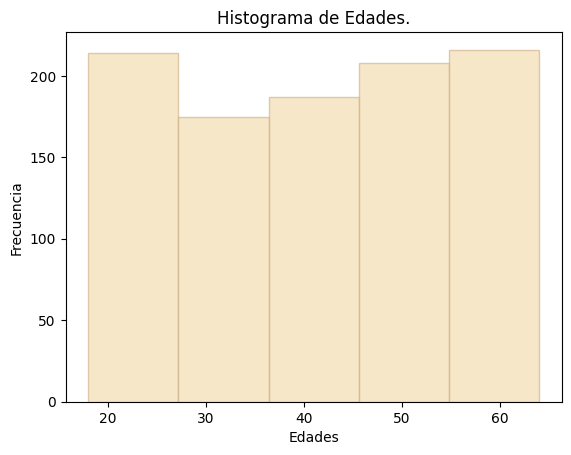

In [26]:
# Se obtiene del DataFrame solo los datos que se usaran en los graficos.
age = df["age"]
# Crea histograma.

plt.hist(age,bins=5, edgecolor='tan', color="wheat",alpha=0.7)
plt.title('Histograma de Edades.')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

plt.show()

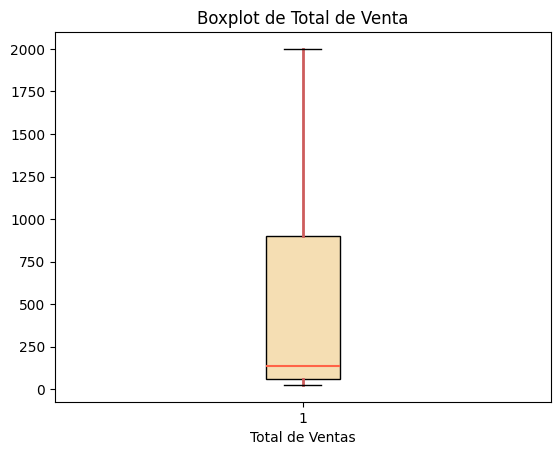

In [29]:
# Se obtiene del DataFrame solo los datos que se usaran en los graficos.
total_venta = df["total_venta"]

# Crea boxplot.

plt.boxplot(total_venta,
            patch_artist = True,
            boxprops = dict(facecolor = "wheat"),
            medianprops = dict(color = "tomato", linewidth = 1.5),
            whiskerprops = dict(color = "indianred", linewidth = 2))
plt.title('Boxplot de Total de Venta')
plt.xlabel('Total de Ventas')


plt.show()

* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

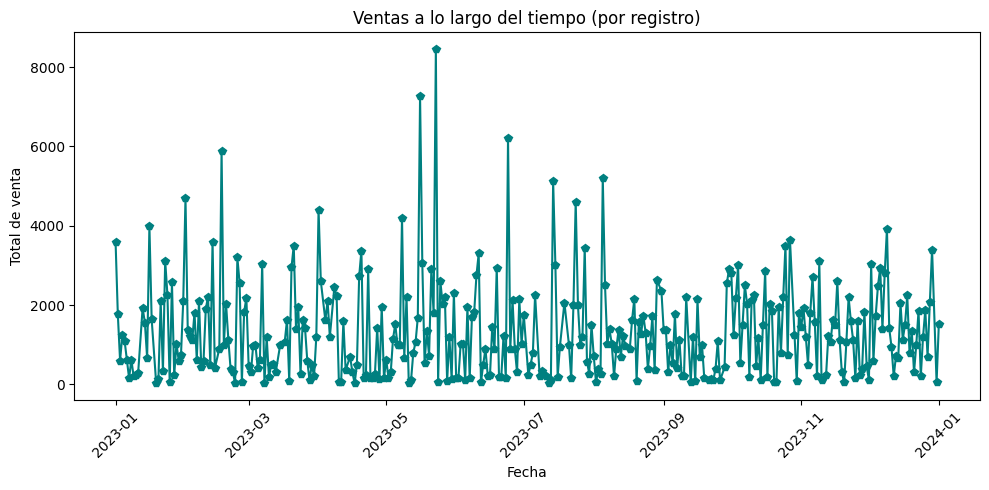

In [46]:
# Se obtiene del DataFrame solo los datos que se usaran en los graficos.
ventas_diarias = df.groupby('date')['total_venta'].sum().reset_index()

# Crea grafico de linea.
plt.figure(figsize=(10, 5))

plt.plot(ventas_diarias['date'],ventas_diarias['total_venta'],
         marker='p',
         linestyle='-',
         color='teal'
         )
plt.title("Ventas a lo largo del tiempo (por registro)")
plt.xlabel("Fecha")
plt.ylabel("Total de venta")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

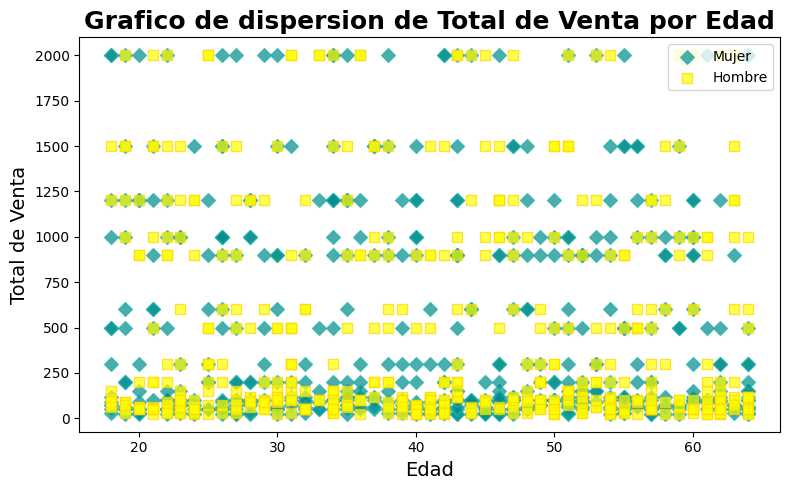

In [43]:
fltr_mujer = (df["gender"] == "Female")
data_nujer = df[fltr_mujer][["total_venta","age"]]

fltr_hombre= (df["gender"] == "Male")
data_hombre= df[fltr_hombre][["total_venta","age"]]


plt.figure(figsize=(8, 5))

plt.scatter( data_nujer["age"],data_nujer["total_venta"],
         color='darkcyan',       # Color de la línea.
         edgecolor='lightseagreen',         # Borde de los puntos.
         marker='D',              # Marcador en cada punto.
         s=50, # Tamaño.
         alpha=0.7, # Transparencia.
         label = "Mujer"
         )
plt.scatter(data_hombre["age"],data_hombre["total_venta"],
         color='yellow',       # Color de la línea.
         edgecolor='gold',         # Borde de los puntos.
         marker='s',              # Marcador en cada punto.
         s=50, # Tamaño.
         alpha=0.7, # Transparencia.
         label="Hombre"
)

plt.title("Grafico de dispersion de Total de Venta por Edad", fontsize=18, fontweight='bold')
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Total de Venta", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

<Figure size 800x500 with 0 Axes>

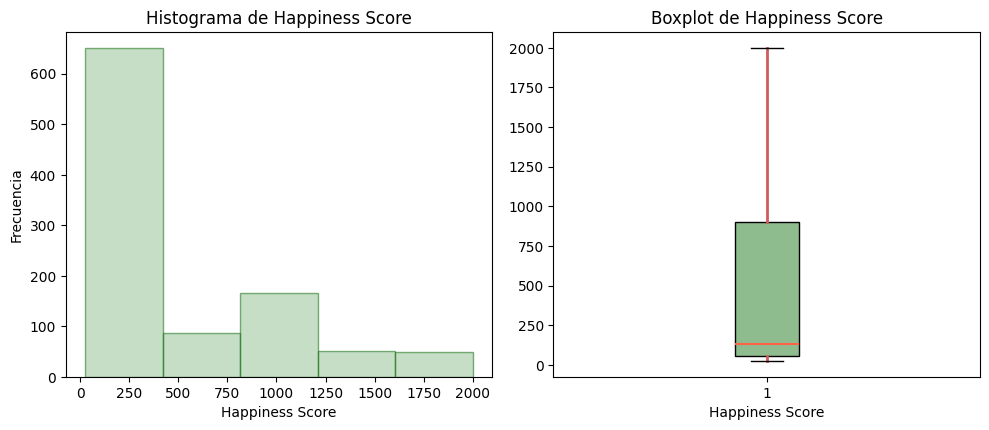

In [49]:
# Se obtiene del DataFrame solo los datos que se usaran en los graficos.
total_venta = df['total_venta']

plt.figure(figsize=(8, 5))

# Asinga tamaño a la figura.
plt.figure(figsize=(10, 8))

# Se crea el subplot indicando la fila columnas y el grafico.
plt.subplot(2, 2, 1)  # 2 fila, 2 columnas, gráfico 1.

# Creamos el histograma 1.
plt.hist(total_venta, bins=5, edgecolor='darkgreen', color="darkseagreen",alpha=0.5)
plt.title('Histograma de Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)  # 2 fila, 2 columnas, gráfico 1.

# Creamos el Boxplot 1.
plt.boxplot(total_venta,
            patch_artist = True,
            boxprops = dict(facecolor = "darkseagreen"),
            medianprops = dict(color = "tomato", linewidth = 1.5),
            whiskerprops = dict(color = "indianred", linewidth = 2)
            )
plt.title('Boxplot de Happiness Score')
plt.xlabel('Happiness Score')


plt.tight_layout() # ajusta los espacios entre subplots.
plt.show()